In [1]:
import numpy as np


import matplotlib.pyplot as plt


from astropy import time, coordinates as coord, units as u


from astropy.coordinates import EarthLocation, AltAz

from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit


In [2]:
herm_ref = 55641.431322
herm_period = 0.246135373


In [3]:
cycles_herm = np.array([620, 623.5, 2184, 3508, 4614.5])  # Cycle numbers

t0_herm = np.array([55794.035261, 55794.896646, 56178.991009, 56504.874289, 56777.222879,  
                ])  # Observed times

t0_err_herm = np.array([np.nan, np.nan, np.nan, np.nan, np.nan, 1.9510587e-05,2.0643243e-05, 
                        2.051600080273196e-05,
                        1.38926283224654e-05])  # Errors


cycles = np.array([19403.0 , 
                   19460.0 ,
                   19641.5 ,
                   19719.5 ])  # Cycle numbers

#t0 = np.array([ 60417.197763553188  ,
#                60431.2275984092,
#              60475.90156122639 ,
#                60495.100220998582   ])  # Observed times

t0_err = np.array([1.8646031e-05 ,
                  2.1610117e-05,
                 3.6633538e-05,
                   2.5263861e-05]) 

#60417.197763553188
#nottingh
t0 =np.array([ 60417.1987910178,
                  60431.228757578305,
                  60475.90201697565,
              60495.100705681994])

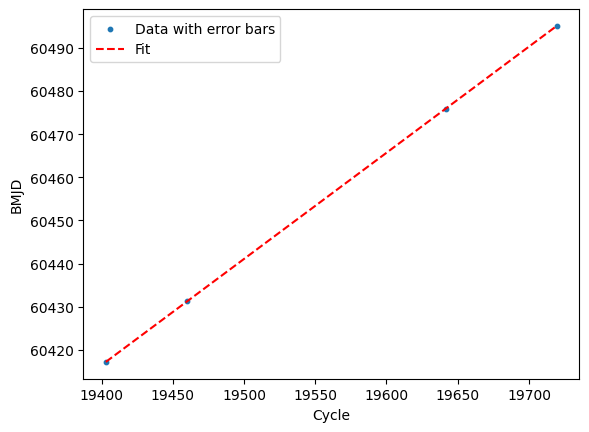

0.24613528148074387 55641.43601612969


In [4]:
  # Change this to your desired slope
coefficients = np.polyfit(cycles, t0, 1,w=1/t0_err)
poly = np.poly1d(coefficients)

fitted_line = poly(cycles)



# Plot data with error bars
plt.scatter(cycles, t0, label="Data with error bars", s=10)
plt.plot(cycles, fitted_line, color='red', linestyle='--', label='Fit')

# Labels and legend
plt.xlabel("Cycle")
plt.ylabel("BMJD")
plt.legend()
plt.show()
print(coefficients[0],coefficients[1])

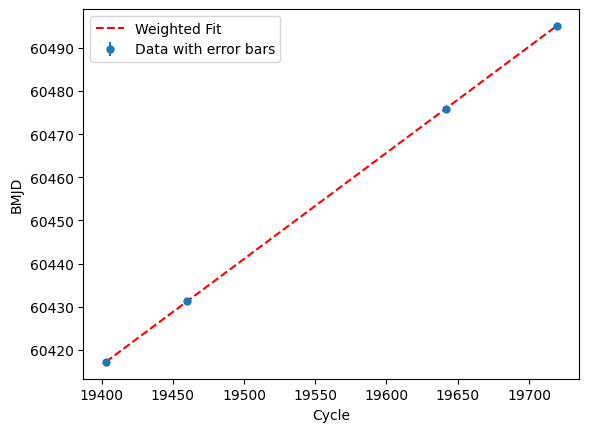

Fitted Slope: 0.24613528148209396, Fitted Intercept: 55641.43601610334
6.273144246366056e-07 0.012240142468836028


In [5]:
# Define a linear function for fitting
def linear_fit(x, slope, intercept):
    return slope * x + intercept

# Perform weighted fit
popt, pcov = curve_fit(linear_fit, cycles, t0, sigma=t0_err)

# Extract the fitted parameters
slope_fit, intercept_fit = popt

# Generate the fitted line
fitted_line = linear_fit(cycles, slope_fit, intercept_fit)

# Plot data with error bars
plt.errorbar(cycles, t0, yerr=t0_err, fmt='o', label="Data with error bars", markersize=5)
plt.plot(cycles, fitted_line, color='red', linestyle='--', label='Weighted Fit')

# Labels and legend
plt.xlabel("Cycle")
plt.ylabel("BMJD")
plt.legend()
plt.show()

# Output the fitted slope and intercept
print(f"Fitted Slope: {slope_fit}, Fitted Intercept: {intercept_fit}")
slope_err, intercept_err = np.sqrt(np.diag(pcov))
print(slope_err,intercept_err)

In [6]:
t0_ref = coefficients[1]
period = coefficients[0]# Reference epoch (first observation)

t0_sci = intercept_fit
period_sci = slope_fit

# Calculate (O-C)
t_calc= t0_ref + cycles * period  # Predicted times
oc= t0 - t_calc  # (O - C)

t_calc1= t0_sci + cycles * period_sci  # Predicted times
oc1= t0 - t_calc1  # (O - C)

t_calc2= t0_sci + cycles_herm * period_sci

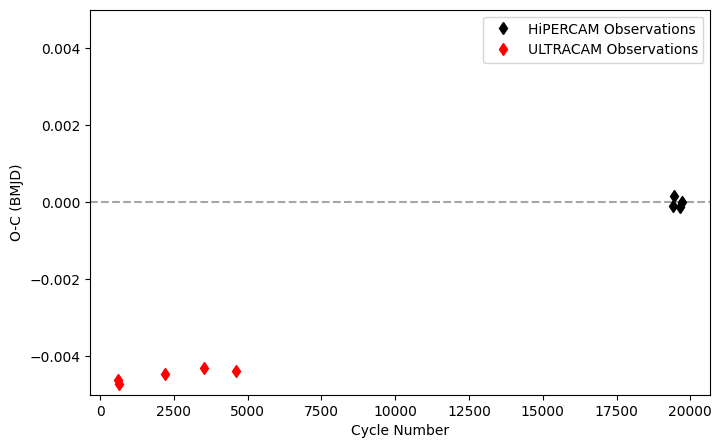

[-0.00462962 -0.00471811 -0.00446186 -0.00429454 -0.0043935 ]


In [7]:
  # Predicted times
oc2= t0_herm - t_calc2  # (O - C)

# Plot O-C diagram
plt.figure(figsize=(8,5))
plt.errorbar(cycles, oc, fmt='kd', capsize=2, label="HiPERCAM Observations")
plt.errorbar(cycles_herm,oc2,fmt='rd',capsize=2, label="ULTRACAM Observations")
#plt.errorbar(cycles, oc1, fmt='ro', capsize=2, label="numpy")
# Labels and legend
plt.xlabel("Cycle Number")
plt.ylabel("O-C (BMJD)")
plt.ylim(-0.005,0.005)
plt.legend()
plt.axhline(0, color='gray', linestyle='--', alpha=0.7)  # Reference zero line

plt.savefig('O-C',format='png')
#plt.ylim(-0.001,0.001)
plt.show()
print(oc2)
#plt.savefig('O-C',format='png')

In [8]:
print( t0_ref + 60417.197763553188)

116058.63377968289
